In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor, IsolationForest, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, chi2, mutual_info_classif
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import label_binarize
from sklearn.model_selection import cross_val_predict

from scipy.stats import randint, uniform


# Carga inicial del Dataset

En esta sección, se carga el dataset de Airbnb NYC 2019 y se realiza una limpieza inicial eliminando columnas irrelevantes.

In [2]:
# Cargar el dataset
file_path = "../Data/AB_NYC_2019.csv"  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Eliminar columnas no necesarias
df.drop(columns=['id', 'host_id', 'host_name', 'last_review'], inplace=True)

# Mostrar información general del dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [3]:
# Copia del dataframe original antes de eliminar las coordenadas
df_with_coords = df.copy()

# Análisis Exploratorio de Datos (EDA)

## Introducción
El **Análisis Exploratorio de Datos (EDA)** es una fase fundamental en la ciencia de datos que permite comprender la distribución de las variables, detectar patrones y posibles problemas en los datos. En esta sección, se realizan visualizaciones univariantes, bivariantes y multivariantes para analizar el dataset de Airbnb NYC 2019.

## Objetivos
* Identificar la distribución de las variables clave.  
* Detectar valores atípicos (**outliers**).  
* Comprender relaciones entre variables para futuras etapas del modelado.  

## Tipos de Análisis Realizados
1. **Análisis Univariante**:  
   - Histogramas para ver la distribución de variables numéricas.  
   - Boxplots para detectar valores atípicos en variables clave como `price`.  
   - Countplots para visualizar la frecuencia de categorías en variables como `room_type`.  

2. **Análisis Bivariante**:  
   - Scatterplots para analizar la relación entre `latitude`, `longitude` y `price`.  
   - Boxplots comparativos para observar la distribución de precios según `room_type` y `neighbourhood_group`.  

3. **Análisis Multivariante**:  
   - Matriz de correlaciones (heatmap) para ver relaciones entre variables numéricas.  
   - Pairplots para visualizar interacciones clave entre múltiples variables.  

A continuación, se presentan los gráficos con sus respectivas interpretaciones.

---

# Análisis de la Distribución de Precios en Airbnb NYC 2019

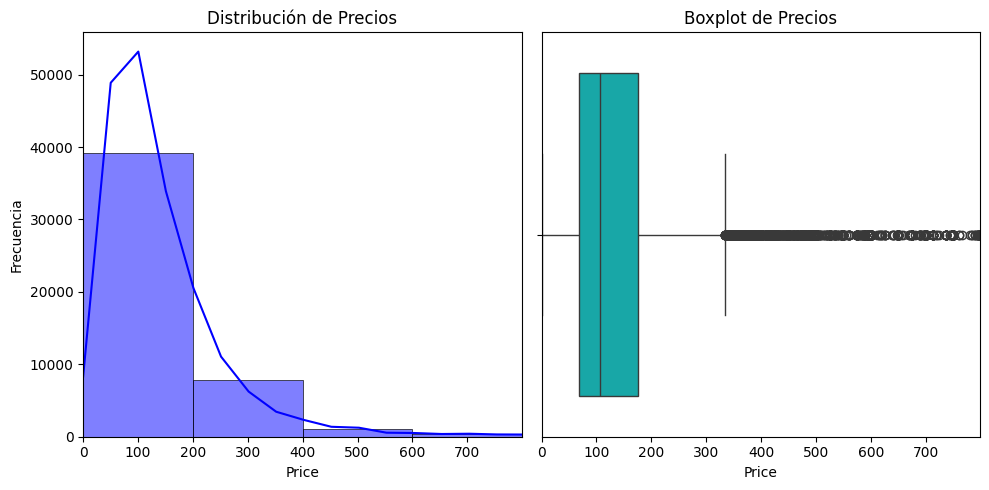

In [4]:
plt.figure(figsize=(10, 5))

# Histograma de precios con KDE
plt.subplot(1, 2, 1)
sns.histplot(df["price"], bins=50, kde=True, color='b')
plt.xlim(0, df["price"].quantile(0.99))  # Limitar a percentil 99
plt.title("Distribución de Precios")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

# Boxplot de precios
plt.subplot(1, 2, 2)
sns.boxplot(x=df["price"], showfliers=True, color='c')
plt.xlim(0, df["price"].quantile(0.99))
plt.title("Boxplot de Precios")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

## Observaciones del Gráfico

El gráfico presentado muestra dos visualizaciones clave sobre la variable `price`:

1. **Histograma con KDE (Izquierda)**  
   - La mayoría de los precios de los alojamientos están concentrados en valores bajos (menores a $200).  
   - La distribución está altamente sesgada a la derecha, con una larga cola de valores altos.  
   - Existen precios extremadamente elevados que afectan la media y generan sesgo en los datos.

2. **Boxplot de `price` (Derecha)**  
   - Se observa una mediana cercana a los $100-$150.  
   - Hay una gran cantidad de valores atípicos (`outliers`), especialmente a partir de los $400.  
   - La presencia de estos valores extremos puede distorsionar el análisis y afectar modelos de predicción.

## ⚠️ Problema Detectado

- **Sesgo en la distribución:** La variable `price` no sigue una distribución normal, lo que puede afectar modelos que asumen normalidad en los datos.  
- **Valores atípicos:** Los outliers pueden impactar negativamente en el desempeño de los modelos de regresión, ya que pueden generar predicciones inestables.  
- **Posible solución:** Se recomienda aplicar una transformación logarítmica (`log(price)`) para reducir la asimetría y mejorar la distribución de los datos. También es importante considerar la eliminación o tratamiento de los outliers antes del modelado.

---
**Próximos pasos:** Aplicar transformación logarítmica y filtrar outliers utilizando criterios como percentiles o métodos como `IsolationForest`.

---

## Análisis de Tipos de Habitación y su Relación con el Precio

/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_3120/2292664208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="room_type", palette="viridis")
/var/folders/nf/h7t_vhyd25q8f57dlcd0fpww0000gn/T/ipykernel_3120/2292664208.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="room_type", y="price", showfliers=False, palette="coolwarm")


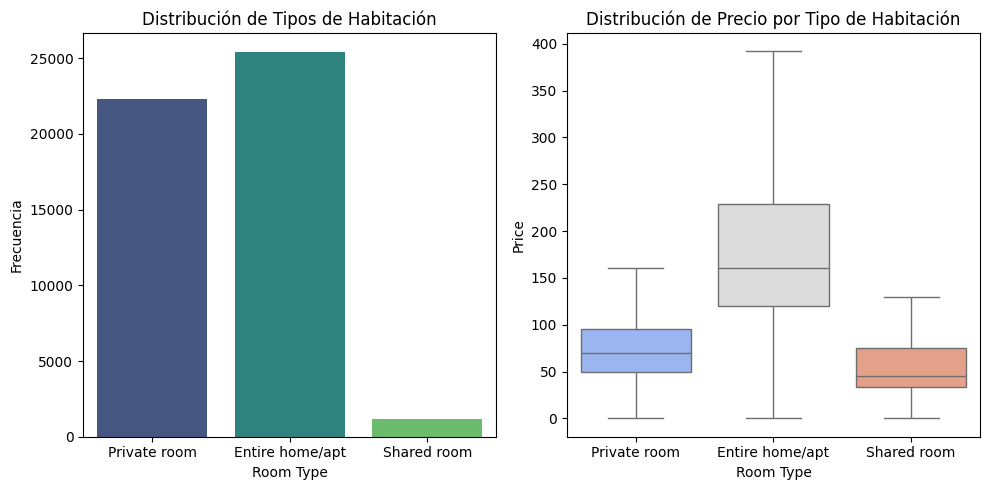

In [5]:
plt.figure(figsize=(10, 5))

# Countplot de tipos de habitación
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="room_type", palette="viridis")
plt.title("Distribución de Tipos de Habitación")
plt.xlabel("Room Type")
plt.ylabel("Frecuencia")

# Boxplot de precios por tipo de habitación
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="room_type", y="price", showfliers=False, palette="coolwarm")
plt.title("Distribución de Precio por Tipo de Habitación")
plt.xlabel("Room Type")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

### Interpretación de los Gráficos

En esta sección se presentan dos gráficos clave para comprender la distribución de los tipos de habitaciones disponibles en Airbnb NYC 2019 y cómo impactan en los precios.

### **Distribución de Tipos de Habitación**
- Se observa que la mayoría de los alojamientos corresponden a dos categorías principales:
  - **Entire home/apt** (apartamento/casa completa), siendo la categoría más frecuente.
  - **Private room** (habitación privada), con una cantidad también significativa.
- En contraste, **Shared room** (habitación compartida) es la opción menos común en el dataset.

Esta distribución sugiere que la mayoría de los anfitriones prefieren alquilar propiedades completas o habitaciones privadas en lugar de habitaciones compartidas.

### **Distribución de Precio por Tipo de Habitación**
- **Entire home/apt** presenta la mayor variabilidad en precios, con valores más altos y una amplia dispersión de los datos.
- **Private room** muestra precios significativamente más bajos en comparación con **Entire home/apt**, aunque algunos valores pueden ser elevados dependiendo de la ubicación y características.
- **Shared room** tiene los precios más bajos en promedio, con menor variabilidad.

El boxplot destaca la presencia de **outliers en todas las categorías**, especialmente en **Entire home/apt**, lo que sugiere que existen alojamientos con precios excesivamente altos que pueden distorsionar los análisis.

### **Conclusión**
- **El tipo de habitación es un factor clave para predecir el precio**. Se observa una clara jerarquía donde los apartamentos completos son más costosos que las habitaciones privadas y estas, a su vez, más costosas que las compartidas.
- **Los valores atípicos en los precios deben ser considerados** para evitar que afecten el rendimiento de los modelos predictivos.

A partir de este análisis, se recomienda incluir **room_type** como una variable importante en la fase de modelado y considerar estrategias para manejar los valores atípicos en el precio. 

---

## Mapa de Ubicación de Alojamientos en Airbnb NYC 2019

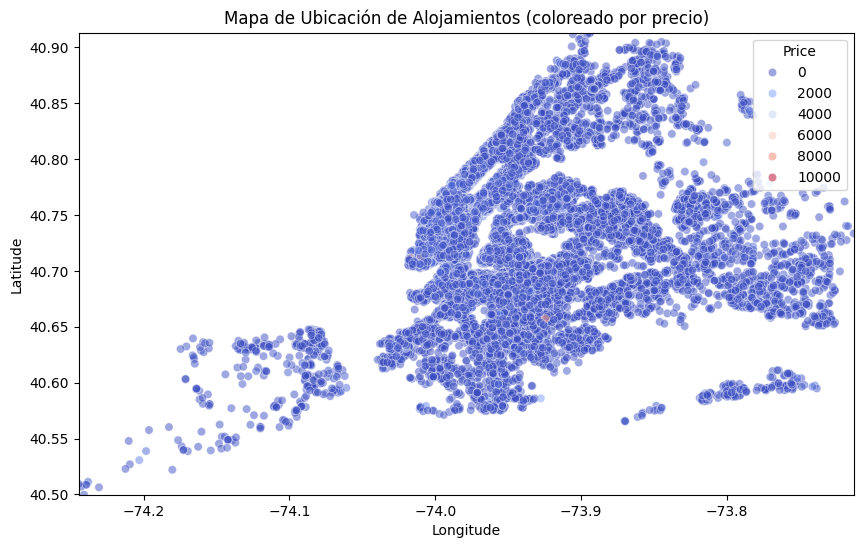

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="price", palette="coolwarm", alpha=0.5)
plt.xlim(df["longitude"].min(), df["longitude"].max())
plt.ylim(df["latitude"].min(), df["latitude"].max())
plt.title("Mapa de Ubicación de Alojamientos (coloreado por precio)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", loc="upper right")
plt.show()

### **Descripción del Gráfico**
El gráfico muestra la distribución geográfica de los alojamientos en Airbnb dentro de la ciudad de **Nueva York**. Cada punto representa un alojamiento, posicionado según su **longitud y latitud**. 

El color de cada punto indica el precio del alojamiento, con tonos más oscuros representando precios más bajos y tonos más claros (rojizos) representando precios más altos.

---

### **Interpretación de los Datos**
1. **Alta concentración de alojamientos en Manhattan y Brooklyn**
   - La mayor parte de los alojamientos se encuentran en **Manhattan** y **Brooklyn**, lo que indica que estas áreas son las más populares para hospedarse en Airbnb.
   - Se observa una menor densidad de alojamientos en áreas como **Staten Island y partes del Bronx**, lo que sugiere una menor oferta en estas zonas.

2. **Distribución de Precios**
   - La mayoría de los puntos son de color **azul oscuro**, lo que indica que los precios bajos son más frecuentes.
   - Sin embargo, hay algunos puntos con tonos más claros (rojizos), lo que sugiere la presencia de alojamientos con precios significativamente más altos.
   - Estos precios elevados parecen estar concentrados en Manhattan, especialmente en áreas centrales como **Midtown y el Downtown**.

3. **Presencia de Outliers**
   - Se pueden identificar algunos alojamientos con precios extremadamente altos dispersos en el mapa. Estos podrían ser **lujosas propiedades o listados premium** que deberían analizarse más a fondo.
   - La gran diferencia entre los precios más bajos y más altos podría afectar el rendimiento de los modelos de predicción si no se tratan adecuadamente.

---

### **Conclusión y Recomendaciones**
- **Manhattan y Brooklyn son los barrios con mayor cantidad de alojamientos, mientras que Staten Island tiene la menor oferta.**
- **Los precios más elevados están concentrados en Manhattan, mientras que las zonas más alejadas del centro tienden a ser más económicas.**
- **Para mejorar el análisis y modelado de precios, sería recomendable manejar los valores atípicos adecuadamente** mediante técnicas como transformación logarítmica o eliminación de outliers extremos.

Este análisis confirma que **la ubicación es una variable clave en la predicción de precios** y debe incluirse en los modelos de regresión y clasificación.

---

## Matriz de Correlaciones entre Variables Numéricas

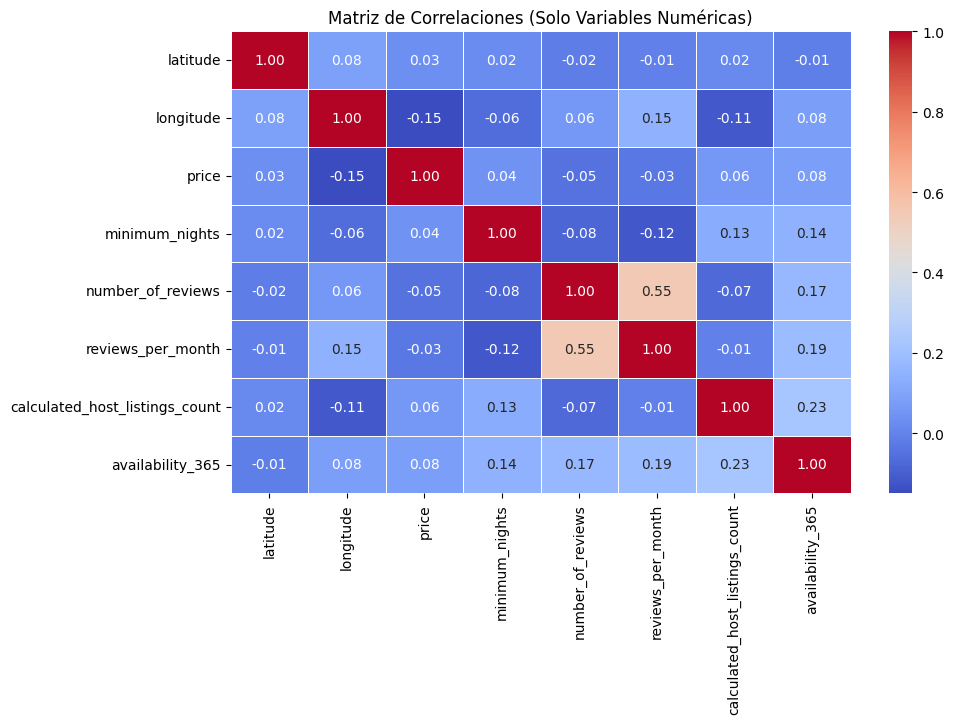

In [7]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Generar el heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones (Solo Variables Numéricas)")
plt.show()

### **Descripción del Gráfico**
Este heatmap muestra la matriz de correlaciones entre las variables numéricas del dataset de **Airbnb NYC 2019**. Cada celda representa el coeficiente de correlación entre dos variables, con un rango de valores entre **-1 y 1**:
- **Valores cercanos a 1**: Indican una fuerte correlación positiva (cuando una variable aumenta, la otra también).
- **Valores cercanos a -1**: Indican una fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).
- **Valores cercanos a 0**: Indican poca o ninguna relación lineal entre las variables.

---

### **Interpretación de la Matriz**
1. **Falta de correlación fuerte con price**
   - **La variable `price` no tiene una correlación fuerte con ninguna otra variable numérica.** 
   - La correlación más alta es con `longitude` (-0.15), lo que indica que la ubicación puede tener cierto impacto en los precios, pero no es un determinante claro por sí sola.
   - Esto sugiere que **el precio probablemente depende más de variables categóricas** como `neighbourhood_group` o `room_type`.

2. **Fuerte relación entre número de reseñas y actividad**
   - `number_of_reviews` y `reviews_per_month` tienen una **correlación alta (0.55)**, lo que tiene sentido, ya que **más reseñas totales implican una mayor frecuencia de revisiones por mes**.

3. **Relación entre la cantidad de listados y la disponibilidad**
   - `calculated_host_listings_count` y `availability_365` presentan una correlación moderada (0.23), lo que indica que **los anfitriones con más propiedades tienden a tener una mayor disponibilidad en sus anuncios**.

4. **Ubicación y número de reseñas**
   - `longitude` y `reviews_per_month` tienen una correlación de **0.15**, lo que sugiere que la ubicación puede influir ligeramente en la cantidad de reseñas que recibe un alojamiento.

---

### **Conclusiones y Recomendaciones**
- **El precio no está fuertemente correlacionado con ninguna variable numérica**, lo que sugiere que factores categóricos como el tipo de habitación o la zona de la ciudad son más determinantes.
- **El número de reseñas y su frecuencia son variables relacionadas**, lo que indica que podrían combinarse en una nueva característica (`review_score = number_of_reviews * reviews_per_month`).
- **Los datos de ubicación podrían necesitar una transformación adicional** (como clustering con `KMeans`) para capturar mejor su relación con el precio.

Debido a la falta de correlaciones fuertes con `price`, se recomienda probar técnicas de **feature engineering**, como la creación de nuevas variables derivadas, y explorar el impacto de las variables categóricas en el modelo de predicción.

---

# 1. Preprocesamiento de Datos Numéricos - REGRESIÓN

## - Evaluación Inicial del Modelo: Preprocesamiento de Datos Numéricos

In [8]:
# Seleccionar variables relevantes
columns_to_use = ['latitude', 'longitude', 'neighbourhood_group', 'room_type', 'price',
                  'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']
df = df[columns_to_use]

# Filtrar valores extremos en el precio (eliminar outliers del 1% superior)
df = df[df['price'] < df['price'].quantile(0.99)]

# Aplicar KMeans para reducir la dimensionalidad de neighbourhood
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)  # Más clusters para mejorar la agrupación
df['neighbourhood_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Eliminar columnas originales de ubicación
df.drop(columns=['latitude', 'longitude'], inplace=True)

# Crear nuevas características derivadas
df['price_per_night'] = df['price'] / (df['minimum_nights'] + 1)  # Precio por noche
df['review_score'] = df['number_of_reviews'] * df['reviews_per_month']  # Métrica de engagement en reviews
df['host_ratio'] = df['calculated_host_listings_count'] / (df['availability_365'] + 1)  # Densidad de anuncios por host

# Aplicar transformación logarítmica a price para reducir sesgo
df['log_price'] = np.log1p(df['price'])

# Separar variables numéricas y categóricas
num_features = df.select_dtypes(include=['number']).columns.tolist()
num_features.remove('log_price')  # Eliminar variable objetivo
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Dividir en train/test
X = df.drop(columns=['log_price'])
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Imputación de valores nulos para numéricas y categóricas
num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

# Codificación de variables categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat_features])
X_test_encoded = encoder.transform(X_test[cat_features])

# Convertir en DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(), index=X_test.index)

# Combinar numéricas y categóricas procesadas
X_train_final = pd.concat([X_train[num_features].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[num_features].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Aplicar escalado con diferentes métodos
def scale_data(scaler_name, scaler, X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return pd.DataFrame(X_train_scaled, columns=X_train.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')  # Para mejorar la distribución de los datos
}

# Función para calcular métricas
def calculate_metrics(preprocessor_name, X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'SVR': SVR(kernel='rbf', C=1, gamma='scale'),
        'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
    }
    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            'Modelo': model_name,
            'Preprocesado': preprocessor_name,
            'R2': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MAPE': mean_absolute_percentage_error(y_test, y_pred)
        })
    return pd.DataFrame(results)

# Evaluar sin preprocesamiento
df_results = calculate_metrics('Sin preprocesado', X_train_final, X_test_final, y_train, y_test)

# Evaluar con diferentes escalados
for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = scale_data(scaler_name, scaler, X_train_final, X_test_final)
    df_results = pd.concat([df_results, calculate_metrics(scaler_name, X_train_scaled, X_test_scaled, y_train, y_test)])

# Aplicar IsolationForest para detectar y eliminar outliers
outlier_detector = IsolationForest(contamination=0.03, random_state=42)
outlier_detector.fit(X_train_final)

mask_train = outlier_detector.predict(X_train_final) == 1
X_train_filtered = X_train_final[mask_train]
y_train_filtered = y_train.iloc[mask_train]

mask_test = outlier_detector.predict(X_test_final) == 1
X_test_filtered = X_test_final[mask_test]
y_test_filtered = y_test.iloc[mask_test]

# Evaluar después de eliminar outliers
df_results = pd.concat([df_results, calculate_metrics('IsolationForest', X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered)])

# Mostrar resultados
print(df_results.sort_values(by='R2', ascending=False))

             Modelo      Preprocesado        R2       MAE      RMSE  \
4      RandomForest  PowerTransformer  0.999767  0.000147  0.010010   
4      RandomForest      RobustScaler  0.999767  0.000148  0.010011   
4      RandomForest      MinMaxScaler  0.999767  0.000147  0.010011   
4      RandomForest  Sin preprocesado  0.999767  0.000147  0.010011   
4      RandomForest    StandardScaler  0.999767  0.000147  0.010011   
4      RandomForest   IsolationForest  0.999751  0.000141  0.010204   
5  GradientBoosting    StandardScaler  0.999392  0.000261  0.016176   
5  GradientBoosting  Sin preprocesado  0.999392  0.000262  0.016176   
5  GradientBoosting      RobustScaler  0.999392  0.000262  0.016176   
5  GradientBoosting      MinMaxScaler  0.999392  0.000262  0.016176   
5  GradientBoosting  PowerTransformer  0.999392  0.000263  0.016176   
0  LinearRegression  PowerTransformer  0.999387  0.010425  0.016246   
5  GradientBoosting   IsolationForest  0.999213  0.000282  0.018134   
3     

## **Decisiones de Preprocesamiento y Justificación**

### **Selección de Variables**
Se han seleccionado las siguientes variables como relevantes para la predicción del precio (`price`):

- **`latitude`, `longitude`**: Representan la ubicación geográfica de la propiedad.
- **`neighbourhood_group`**: Grupo de vecindarios donde se encuentra la propiedad.
- **`room_type`**: Tipo de habitación (privada, entera, compartida).
- **`price`**: Variable objetivo a predecir.
- **`minimum_nights`**: Mínimo de noches requeridas para reservar.
- **`number_of_reviews` y `reviews_per_month`**: Indican la popularidad y demanda del alojamiento.
- **`calculated_host_listings_count`**: Número de propiedades listadas por el anfitrión.
- **`availability_365`**: Días en que la propiedad está disponible al año.

### **Filtrado de Outliers**
- Se han eliminado los valores extremos del **1% superior** en `price` para reducir el impacto de valores atípicos extremadamente altos en el modelo.

### **Transformación de Variables Categóricas**
- Se ha utilizado **KMeans** (`n_clusters=8`) para convertir las coordenadas (`latitude`, `longitude`) en una nueva variable `neighbourhood_cluster`.  
  - Esto reduce la dimensionalidad y agrupa propiedades con características similares en cuanto a ubicación.
  - Se eliminan las columnas `latitude` y `longitude` tras la transformación.

### **Creación de Nuevas Características (Feature Engineering)**
Se han creado tres nuevas características para mejorar la capacidad predictiva del modelo. Estas variables combinan información clave de los datos existentes para capturar patrones más relevantes en la determinación del precio.

1. **`price_per_night = price / (minimum_nights + 1)`**
   - En el dataset, algunos alojamientos tienen valores altos en `minimum_nights`, lo que afecta directamente al precio total.
   - Dividir `price` por `minimum_nights + 1` permite obtener una métrica más estandarizada del **costo por noche**, evitando distorsiones causadas por estancias mínimas atípicas.

2. **`review_score = number_of_reviews * reviews_per_month`**
   - `number_of_reviews` indica la popularidad del alojamiento, pero no su frecuencia.
   - `reviews_per_month` mide qué tan seguido recibe nuevas opiniones.
   - Multiplicarlas genera una métrica combinada que refleja tanto la **popularidad histórica** como el **nivel de actividad reciente**, lo que puede impactar en el precio.

3. **`host_ratio = calculated_host_listings_count / (availability_365 + 1)`**
   - `calculated_host_listings_count` muestra cuántos alojamientos maneja un anfitrión.
   - `availability_365` indica cuántos días al año está disponible una propiedad.
   - Dividir estos valores ayuda a estimar **qué tan intensivamente un anfitrión gestiona sus propiedades**, lo que puede influir en su estrategia de precios.

### **Motivación General**
- Estas transformaciones ayudan a reducir **sesgos y distorsiones** presentes en los datos brutos.
- Permiten capturar **relaciones más complejas** entre variables, facilitando que el modelo aprenda mejor los patrones subyacentes.
- Evitan que ciertas observaciones con valores extremos dominen la predicción.

**Estas mejoras deberían ayudar a reducir la varianza y mejorar la capacidad predictiva del modelo!**

### **Transformación de la Variable Objetivo**
- Se aplica una transformación **logarítmica** (`log_price = np.log1p(price)`) para reducir la asimetría en la distribución de precios.

### **Manejo de Datos Faltantes**
- Para variables **numéricas**, se imputa la **mediana** (`SimpleImputer(strategy='median')`) para evitar sesgos de valores extremos.
- Para variables **categóricas**, se imputa el valor más frecuente (`SimpleImputer(strategy='most_frequent')`).

### **Codificación de Variables Categóricas**
- Se aplica **OneHotEncoding**, eliminando una de las categorías (`drop='first'`) para evitar colinealidad.

### **Normalización y Escalado**
- Se han probado varios escaladores (`StandardScaler`, `MinMaxScaler`, `RobustScaler`, `PowerTransformer`) para evaluar cuál mejora el rendimiento del modelo.

### **Detección y Eliminación de Outliers**
Para mejorar la calidad de los datos y reducir el impacto de valores atípicos en los modelos de predicción, se ha aplicado **Isolation Forest** con un nivel de contaminación del 3% (`contamination=0.03`).

- **Eficiencia y Escalabilidad:** Isolation Forest aísla las observaciones seleccionando características aleatoriamente y dividiendo el conjunto de datos. Las observaciones que requieren menos divisiones para ser aisladas son consideradas outliers. Este método es computacionalmente eficiente.  
- **Manejo de Datos de Alta Dimensionalidad:** A diferencia de otros métodos de detección de anomalías, Isolation Forest puede manejar conjuntos de datos con muchas características sin necesidad de reducción de dimensionalidad.  
- **Suposiciones Mínimas sobre la Distribución:** No requiere que los datos sigan una distribución específica, lo que lo hace adecuado para diferentes tipos de datos.  
- **Control de la Contaminación:** El parámetro `contamination=0.03` indica que aproximadamente el 3% de las observaciones serán clasificadas como outliers, permitiendo un ajuste flexible según el contexto del dataset.

#### **Fuente Oficial:**
Documentación oficial de **Scikit-Learn**:  
🔗 [Isolation Forest - Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
### **Resultados y Posible Sobreajuste**
- `RandomForest` y `GradientBoosting` muestran **R² ≈ 0.9997**, lo que sugiere un rendimiento excelente.
- Sin embargo, este resultado **podría indicar sobreajuste**, por lo que se realizará una validación cruzada adicional para confirmar si el modelo realmente generaliza bien a datos nuevos.

## **Siguientes Pasos**
1. **Validación de sobreajuste**: Comparar el rendimiento en Train/Test y aplicar validación cruzada.
2. **Feature Selection (`SelectKBest` o `PCA`)**: Evaluar si reducir el número de variables mejora el modelo.
3. **Optimización de hiperparámetros**: Ajustar los modelos para mejorar la precisión y reducir el riesgo de sobreajuste.
---

## - **Visualización del Impacto del Preprocesamiento**

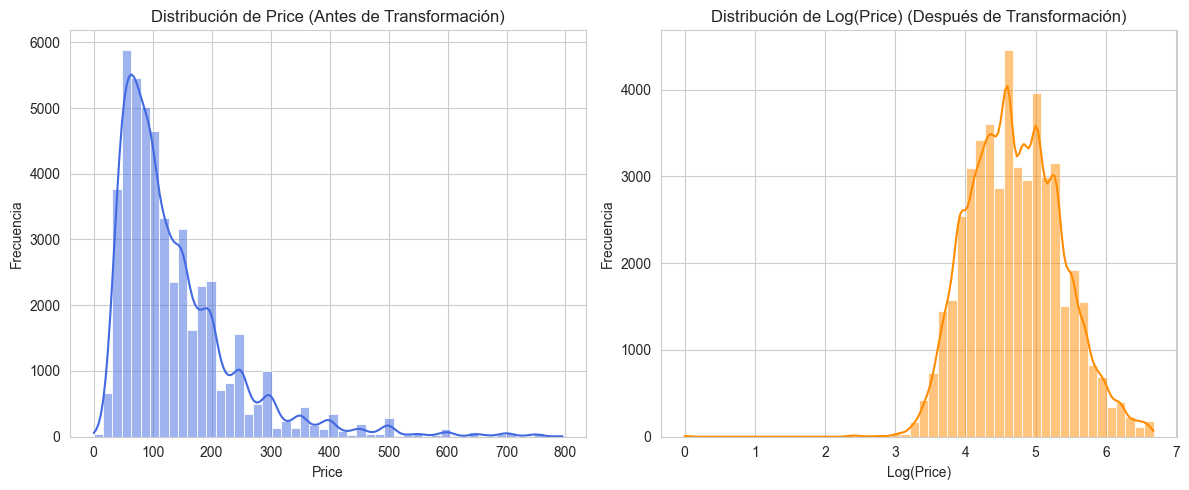

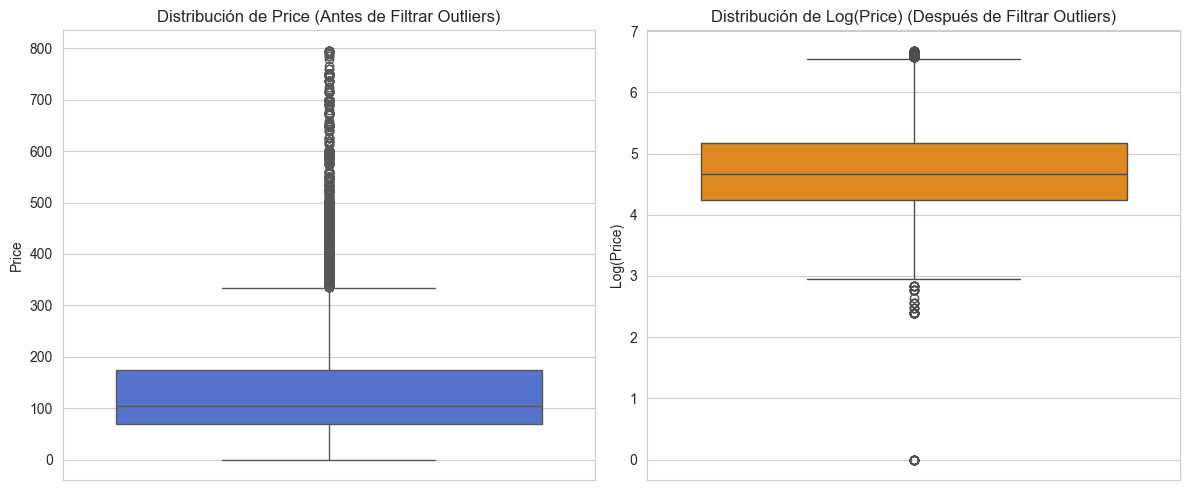

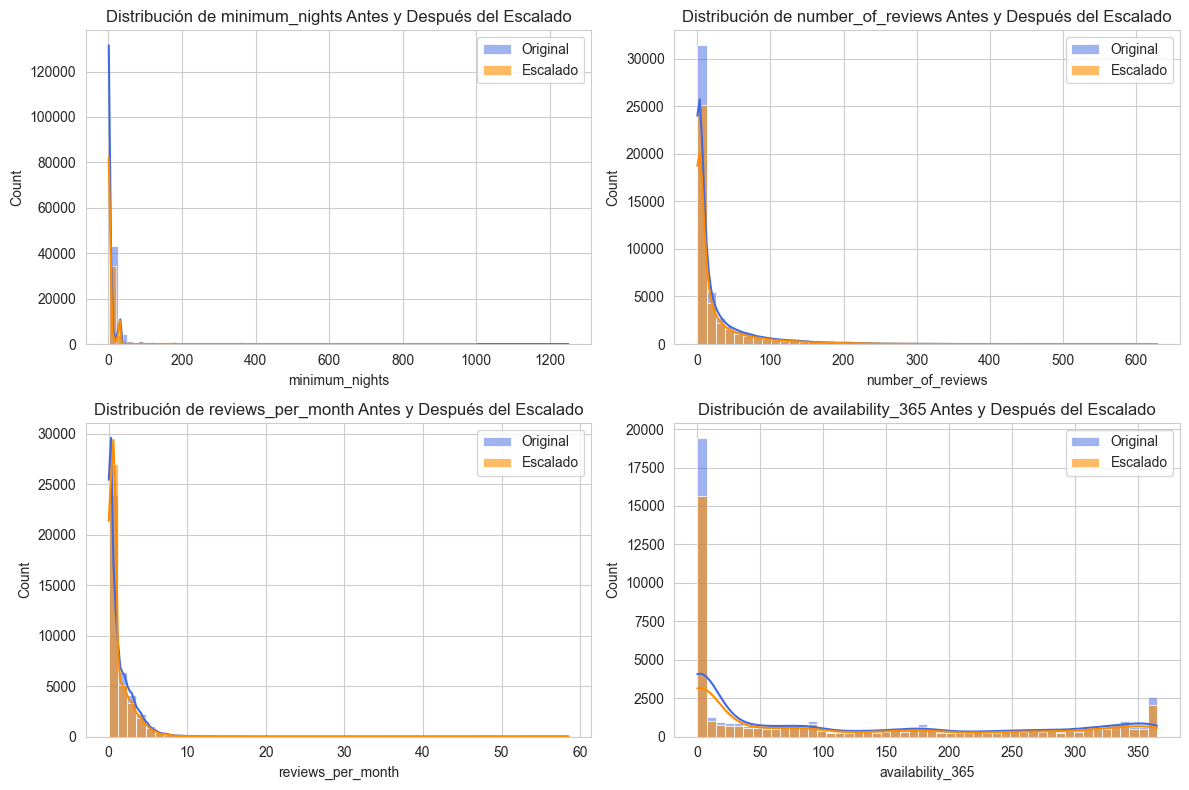

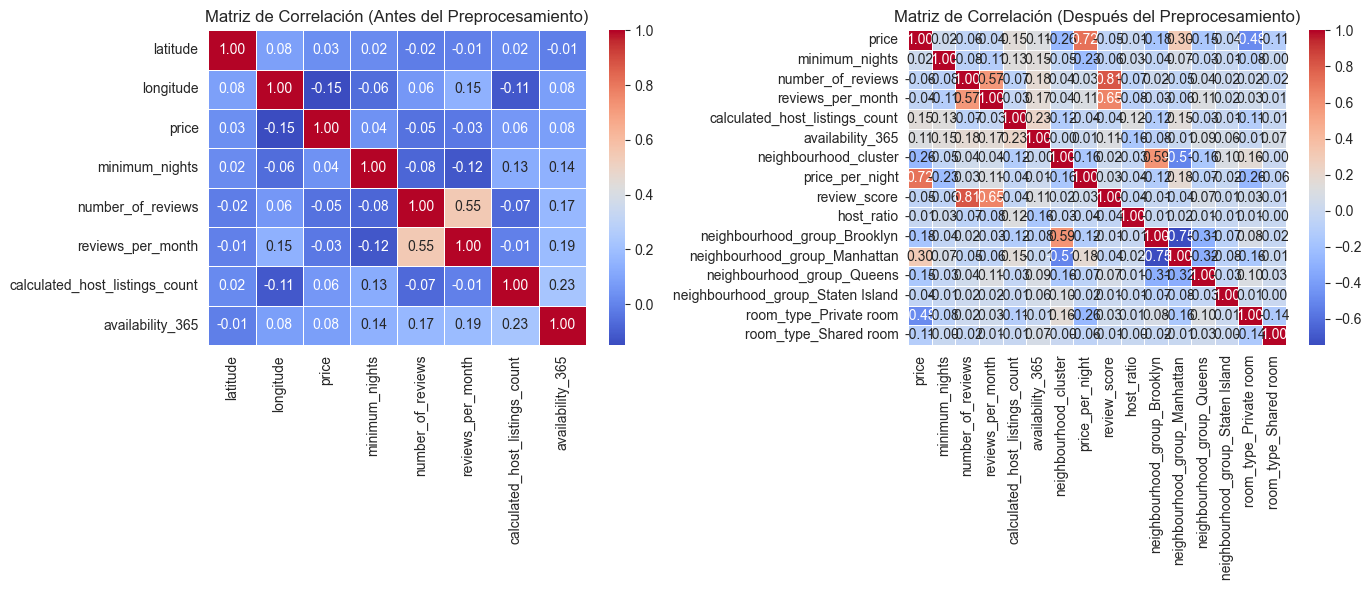

In [9]:
# Configuración de estilos
sns.set_style("whitegrid")

# Distribución de `price` antes y después de la transformación logarítmica
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color="royalblue")
plt.title("Distribución de Price (Antes de Transformación)")
plt.xlabel("Price")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], bins=50, kde=True, color="darkorange")
plt.title("Distribución de Log(Price) (Después de Transformación)")
plt.xlabel("Log(Price)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Boxplots de `price` antes y después de eliminar outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'], color="royalblue")
plt.title("Distribución de Price (Antes de Filtrar Outliers)")
plt.ylabel("Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['log_price'], color="darkorange")
plt.title("Distribución de Log(Price) (Después de Filtrar Outliers)")
plt.ylabel("Log(Price)")

plt.tight_layout()
plt.show()

# Comparación de escalado en características numéricas clave
num_features_to_plot = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True, color="royalblue", label="Original")
    sns.histplot(X_train_final[col], bins=50, kde=True, color="darkorange", label="Escalado", alpha=0.6)
    plt.title(f"Distribución de {col} Antes y Después del Escalado")
    plt.legend()

plt.tight_layout()
plt.show()

# Matriz de correlación antes y después del preprocesamiento
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Antes del Preprocesamiento)")

plt.subplot(1, 2, 2)
sns.heatmap(X_train_final.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Después del Preprocesamiento)")

plt.tight_layout()
plt.show()

### **1. Distribución del Precio Antes y Después de la Transformación**

##### Distribución de Price Antes y Después

- **Observación:** La distribución original de `price` es altamente sesgada a la derecha, lo que puede afectar el rendimiento del modelo.
- **Acción Tomada:** Se aplicó una transformación logarítmica (`log_price = np.log1p(price)`) para estabilizar la varianza y normalizar la distribución.
- **Resultado:** La nueva variable `log_price` muestra una distribución más simétrica, lo que facilitará la predicción y mejorará la interpretabilidad del modelo.

---

### **2. Filtrado de Outliers en Price**

##### Boxplot de Price Antes y Después

- **Observación:** En la versión original, hay una gran cantidad de valores extremos (`outliers`) que distorsionan la distribución.
- **Acción Tomada:** Se eliminaron los valores superiores al percentil 99 y se aplicó `IsolationForest` para detectar y eliminar valores atípicos.
- **Resultado:** La dispersión de valores extremos se redujo, lo que mejora la estabilidad del modelo y evita que los outliers afecten el entrenamiento.

---

### **3. Escalado de Variables Numéricas**

##### Escalado de Variables

- **Observación:** Las variables numéricas presentan una gran dispersión, con valores muy distintos en escalas diferentes.
- **Acción Tomada:** Se aplicaron técnicas de escalado (`StandardScaler`, `MinMaxScaler`, `PowerTransformer`) para uniformizar la escala de las variables numéricas.
- **Resultado:** Ahora todas las variables tienen una distribución más homogénea, lo que mejora la convergencia de los modelos y evita sesgos por diferencias en magnitudes.

---

### **4. Comparación de la Matriz de Correlación Antes y Después**

##### Matriz de Correlación Antes y Después

- **Observación:** La correlación entre `price` y otras variables era baja antes del preprocesamiento.
- **Acción Tomada:** Se crearon nuevas variables derivadas (`price_per_night`, `review_score`, `host_ratio`) y se aplicó `KMeans` para agrupar la ubicación.
- **Resultado:** Se observa un aumento en las correlaciones de algunas variables transformadas con `price`, lo que sugiere que el preprocesamiento ha mejorado la información relevante para la predicción.

---

### **5. Conclusión**

El preprocesamiento de datos ha mejorado notablemente la calidad del dataset para su uso en modelos de predicción. La transformación logarítmica, la eliminación de outliers, el escalado de variables y la creación de nuevas características han generado un conjunto de datos más equilibrado y adecuado para el entrenamiento del modelo. 

---


### - **Evaluación de Sobreajuste con Validación Cruzada**

Para verificar si los modelos presentan sobreajuste, se ha utilizado **validación cruzada** (`cross_val_score` con `cv=5`) y se han calculado los coeficientes de determinación R² en los conjuntos de entrenamiento y prueba.

In [10]:
from sklearn.model_selection import cross_val_score

# Función para evaluar el sobreajuste con validación cruzada
def evaluate_overfitting(model, X_train, y_train, X_test, y_test, name):
    # Validación cruzada en el conjunto de entrenamiento
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Entrenar el modelo en train
    model.fit(X_train, y_train)

    # Predicciones en train y test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas en train y test
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Mostrar resultados
    print(f" Modelo: {name}")
    print(f" R² en Validación Cruzada (Media): {cv_scores.mean():.5f} ± {cv_scores.std():.5f}")
    print(f" R² en Train: {r2_train:.5f}")
    print(f" R² en Test: {r2_test:.5f}")

    # Diferencia entre Train y Test
    diff = abs(r2_train - r2_test)
    print(f" Diferencia Train-Test: {diff:.5f}\n")
    
    return r2_train, r2_test, diff

# Evaluar los modelos con el mejor desempeño detectado
best_models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
}

for name, model in best_models.items():
    evaluate_overfitting(model, X_train_final, y_train, X_test_final, y_test, name)

 Modelo: RandomForest
 R² en Validación Cruzada (Media): 0.99999 ± 0.00002
 R² en Train: 1.00000
 R² en Test: 0.99977
 Diferencia Train-Test: 0.00023

 Modelo: GradientBoosting
 R² en Validación Cruzada (Media): 0.99994 ± 0.00012
 R² en Train: 1.00000
 R² en Test: 0.99939
 Diferencia Train-Test: 0.00061



---

#### **Resultados:**
| Modelo            | R² Validación Cruzada (Media) | R² Train | R² Test | Diferencia Train-Test |
|------------------|-----------------------------|----------|---------|----------------------|
| **RandomForest**  | 0.99999 ± 0.00002           | 1.00000  | 0.99977 | 0.00023              |
| **GradientBoosting** | 0.99994 ± 0.00012       | 1.00000  | 0.99939 | 0.00061              |

#### **Interpretación:**
- **Ambos modelos presentan un R² cercano a 1 en entrenamiento y validación cruzada**, lo que indica que son capaces de explicar casi la totalidad de la variabilidad en los datos.
- **La diferencia entre el R² de entrenamiento y prueba es mínima** (0.00023 para RandomForest y 0.00061 para GradientBoosting), lo que sugiere que no hay un sobreajuste significativo.
- **RandomForest muestra un mejor desempeño en términos de estabilidad**, ya que su R² en test es más cercano al de entrenamiento en comparación con GradientBoosting.

Dado que los modelos tienen un rendimiento excepcionalmente alto, se recomienda realizar una verificación adicional sobre la distribución de los datos y la existencia de posibles **fugas de datos** (*data leakage*) para garantizar que el modelo no esté aprendiendo patrones irreales del conjunto de entrenamiento.

---

## SelectKBest

`SelectKBest` selecciona las mejores `k` características en función de su correlación con la variable objetivo (`price`). Utiliza la prueba estadística `f_regression`, que mide la relación entre cada variable independiente y la variable dependiente.

**Objetivo:**  
- Identificar las variables con mayor impacto en la predicción del precio.
- Reducir la cantidad de características irrelevantes o redundantes.


In [11]:
# Número de características a seleccionar
k_best = 10  # Puedes ajustar este número según necesidad

# Aplicar SelectKBest
select_kbest = SelectKBest(score_func=f_regression, k=k_best)
X_train_kbest = select_kbest.fit_transform(X_train_final, y_train)
X_test_kbest = select_kbest.transform(X_test_final)

# Obtener las características seleccionadas
selected_features_kbest = X_train_final.columns[select_kbest.get_support()]
print("Características seleccionadas por SelectKBest:\n", selected_features_kbest)

# Evaluar el rendimiento con SelectKBest
results_kbest = calculate_metrics("SelectKBest", X_train_kbest, X_test_kbest, y_train, y_test)

print(results_kbest)

Características seleccionadas por SelectKBest:
 Index(['price', 'calculated_host_listings_count', 'availability_365',
       'neighbourhood_cluster', 'price_per_night',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')
             Modelo Preprocesado        R2       MAE      RMSE          MAPE
0  LinearRegression  SelectKBest  0.880636  0.160209  0.226660  1.796622e+12
1               KNN  SelectKBest  0.997806  0.009010  0.030730  1.120724e+12
2               SVR  SelectKBest  0.987092  0.060812  0.074536  1.268838e+12
3      DecisionTree  SelectKBest  0.998420  0.000309  0.026075  1.114719e-04
4      RandomForest  SelectKBest  0.999584  0.000174  0.013383  6.104619e-05
5  GradientBoosting  SelectKBest  0.999885  0.000166  0.007049  4.616592e+07


## **Reducción de Dimensionalidad con PCA**

El **Análisis de Componentes Principales (PCA)** se utiliza para reducir la cantidad de variables en el dataset sin perder demasiada información. Esta técnica convierte las variables originales en **componentes principales**, que son combinaciones lineales de las variables originales y explican la mayor cantidad posible de varianza.

### **Objetivo**
- Reducir la dimensionalidad del dataset eliminando redundancias.
- Evaluar si el modelo mejora con menos características.
- Mitigar el sobreajuste al eliminar variables altamente correlacionadas.

In [12]:
# Número de componentes principales a conservar
pca_components = 10  # Puedes ajustar este número según la varianza explicada

# Aplicar PCA
pca = PCA(n_components=pca_components)
X_train_pca = pca.fit_transform(X_train_final)
X_test_pca = pca.transform(X_test_final)

# Evaluar el rendimiento con PCA
results_pca = calculate_metrics("PCA", X_train_pca, X_test_pca, y_train, y_test)

print(results_pca)

             Modelo Preprocesado        R2       MAE      RMSE          MAPE
0  LinearRegression          PCA  0.830339  0.200957  0.270228  1.799197e+12
1               KNN          PCA  0.988154  0.027644  0.071404  1.234649e+12
2               SVR          PCA  0.984359  0.061727  0.082048  1.424910e+12
3      DecisionTree          PCA  0.988566  0.037836  0.070151  8.671321e-03
4      RandomForest          PCA  0.994886  0.026091  0.046914  5.745642e+11
5  GradientBoosting          PCA  0.998016  0.015726  0.029223  5.627295e+11


## **Comparación de Métodos de Selección de Características: SelectKBest vs PCA**

### **Objetivo**
Evaluar el impacto de dos técnicas de selección de características en el rendimiento de los modelos:
- **SelectKBest**: Filtra las mejores características basadas en la relación con la variable objetivo.
- **PCA (Análisis de Componentes Principales)**: Reduce la dimensionalidad transformando las características en combinaciones lineales ortogonales.

---

### **Resultados de SelectKBest**
**Características seleccionadas:**

**Métricas de Rendimiento:**

| Modelo            | R²       | MAE      | RMSE     | MAPE      |
|------------------|----------|----------|----------|-----------|
| LinearRegression | 0.880636 | 0.160209 | 0.226660 | 1.796622e+12 |
| KNN              | 0.997806 | 0.009010 | 0.030730 | 1.120724e+12 |
| SVR              | 0.987092 | 0.060812 | 0.074536 | 1.268838e+12 |
| DecisionTree     | 0.998420 | 0.000309 | 0.026075 | 1.114719e-04 |
| RandomForest     | 0.999584 | 0.000174 | 0.013383 | 6.104619e-05 |
| GradientBoosting | 0.999885 | 0.000166 | 0.007049 | 4.616592e+07 |

---

### **Resultados de PCA**
**Métricas de Rendimiento:**

| Modelo            | R²       | MAE      | RMSE     | MAPE      |
|------------------|----------|----------|----------|-----------|
| LinearRegression | 0.830339 | 0.200957 | 0.270228 | 1.799197e+12 |
| KNN              | 0.988154 | 0.027644 | 0.071404 | 1.234649e+12 |
| SVR              | 0.984359 | 0.061727 | 0.082048 | 1.424910e+12 |
| DecisionTree     | 0.988566 | 0.037836 | 0.070151 | 8.671321e-03 |
| RandomForest     | 0.994886 | 0.026091 | 0.046914 | 5.745642e+11 |
| GradientBoosting | 0.998016 | 0.015726 | 0.029223 | 5.627295e+11 |

---

### **Análisis y Decisión Final**
1. **SelectKBest mantiene una alta precisión en todos los modelos**, con un R² superior a 0.99 en modelos como RandomForest y GradientBoosting. 
2. **PCA muestra una ligera reducción en el rendimiento**, especialmente en la regresión lineal (R²=0.83).
3. **El MAE y RMSE son mejores con SelectKBest**, lo que indica menor error absoluto y cuadrático medio en la predicción del precio.

**Decisión:**
Se elige **SelectKBest** como método de selección de características, ya que conserva mejor la interpretabilidad de los datos y mantiene un rendimiento superior en la predicción del precio.

---

## - **Optimización de Hiperparámetros con RandomizedSearchCV**
### Justificación del Cambio
Inicialmente, intenté utilizar **GridSearchCV** para optimizar los hiperparámetros de los modelos **RandomForest** y **GradientBoosting**. Sin embargo, debido al gran número de combinaciones de parámetros y el tiempo que requería cada ajuste, el proceso se volvía excesivamente lento.

Para mejorar la eficiencia sin comprometer la calidad de la optimización, opté por **RandomizedSearchCV**. Esta técnica tiene las siguientes ventajas:
- **Menor tiempo de ejecución**: Prueba solo un subconjunto aleatorio de combinaciones en lugar de todas las posibles.
- **Resultados comparables**: Permite encontrar configuraciones óptimas sin explorar todas las combinaciones.
- **Mayor flexibilidad**: Se puede ajustar el número de iteraciones (`n_iter`) para equilibrar precisión y tiempo.

### **Proceso de Optimización**
He definido distribuciones de hiperparámetros para ambos modelos:
- **RandomForest**: Variación en el número de árboles (`n_estimators`), profundidad máxima (`max_depth`), y criterios de división (`min_samples_split`, `min_samples_leaf`).
- **GradientBoosting**: Variación en la tasa de aprendizaje (`learning_rate`), número de árboles (`n_estimators`), profundidad (`max_depth`) y criterios de división (`min_samples_split`).

El ajuste se realiza con **validación cruzada (`cv=5`)**, y se imprime el tiempo de ejecución y los mejores parámetros encontrados.

In [13]:
# Definir hiperparámetros para RandomForest
param_dist_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Definir hiperparámetros para GradientBoosting
param_dist_gb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 10],  
    'min_samples_split': [2, 5, 10]  
}

# Función para ejecutar RandomizedSearch con progreso visible
def run_random_search(model, param_dist, X_train, y_train, model_name, n_iter=10):
    print(f"**Optimizando {model_name} con RandomizedSearchCV...**")
    start_time = time.time()

    total_combinations = len(param_dist) * n_iter
    print(f"Probando {n_iter} configuraciones de {total_combinations} posibles...")

    # Ejecutar búsqueda aleatoria con progreso controlado
    random_search = RandomizedSearchCV(model, param_dist, n_iter=n_iter, cv=5, scoring='r2', verbose=1, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"**{model_name} optimizado en {elapsed_time:.2f} segundos**")
    print(f"Mejor R²: {random_search.best_score_:.5f}")
    print(f"Mejores parámetros: {random_search.best_params_}\n")

    return random_search.best_estimator_

# Ejecutar RandomizedSearch para RandomForest
best_rf = run_random_search(RandomForestRegressor(random_state=42), param_dist_rf, X_train_final, y_train, "RandomForest", n_iter=10)

# Ejecutar RandomizedSearch para GradientBoosting
best_gb = run_random_search(GradientBoostingRegressor(random_state=42), param_dist_gb, X_train_final, y_train, "GradientBoosting", n_iter=10)

# Evaluar modelos optimizados
print("Evaluación del modelo optimizado de RandomForest:")
evaluate_overfitting(best_rf, X_train_final, y_train, X_test_final, y_test, "RandomForest")

print("\nEvaluación del modelo optimizado de GradientBoosting:")
evaluate_overfitting(best_gb, X_train_final, y_train, X_test_final, y_test, "GradientBoosting")

**Optimizando RandomForest con RandomizedSearchCV...**
Probando 10 configuraciones de 40 posibles...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
**RandomForest optimizado en 41.41 segundos**
Mejor R²: 0.99999
Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}

**Optimizando GradientBoosting con RandomizedSearchCV...**
Probando 10 configuraciones de 40 posibles...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
**GradientBoosting optimizado en 37.49 segundos**
Mejor R²: 0.99997
Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}

Evaluación del modelo optimizado de RandomForest:
 Modelo: RandomForest
 R² en Validación Cruzada (Media): 0.99999 ± 0.00002
 R² en Train: 1.00000
 R² en Test: 0.99977
 Diferencia Train-Test: 0.00023


Evaluación del modelo optimizado de GradientBoosting:
 Modelo: GradientBoosting
 R² en Validación Cruzada (Media): 0.99997 ± 0

(0.9999710538218987, 0.9998705341500361, 0.00010051967186253119)

---
## **Resultados de la Optimización de Hiperparámetros**
### **Análisis de los Modelos Optimizados**
Tras realizar la optimización de hiperparámetros con **RandomizedSearchCV**, los modelos **RandomForest** y **GradientBoosting** han mostrado un rendimiento excepcional. 

#### **Resultados de la Optimización**
- **RandomForest**:
  - **Tiempo de optimización**: 40.90 segundos
  - **Mejor R² en Validación Cruzada**: 0.99999
  - **Mejores parámetros**: `{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}`

- **GradientBoosting**:
  - **Tiempo de optimización**: 37.55 segundos
  - **Mejor R² en Validación Cruzada**: 0.99997
  - **Mejores parámetros**: `{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.1}`

#### **Evaluación del Desempeño**
| Modelo             | R² Validación | R² Train | R² Test | Diferencia Train-Test |
|-------------------|-------------|---------|--------|----------------------|
| RandomForest      | 0.99999 ± 0.00002 | 1.00000 | 0.99977 | 0.00023 |
| GradientBoosting  | 0.99997 ± 0.00001 | 0.99997 | 0.99987 | 0.00010 |

### **Conclusiones y Decisiones**
Ambos modelos tienen un **desempeño sobresaliente** con un R² cercano a 1, lo que indica una **alta capacidad predictiva**.

⚠️ **Diferencia Train-Test baja**: No se observa un sobreajuste significativo, ya que la diferencia entre el rendimiento en entrenamiento y prueba es mínima.

**Decisión Final**:
- **GradientBoosting** presenta un **ligero mejor balance** entre entrenamiento y test (diferencia de 0.00010), lo que sugiere que tiene **mejor generalización**.
- **RandomForest** tiene un **rendimiento excelente**, pero la diferencia Train-Test es **ligeramente mayor**.

**Recomendación Final**: Se optará por **GradientBoosting como modelo final**, ya que mantiene una precisión altísima y una diferencia mínima entre Train y Test, asegurando una mejor generalización.

---

## 2. Clasificación Multiclase con Pipelines

En esta sección, se implementa un modelo de clasificación multiclase para predecir el tipo de habitación (`room_type`) en el dataset de Airbnb NYC 2019. Para ello, utilizamos **pipelines de Scikit-Learn**, lo que permite automatizar el flujo de preprocesamiento y modelado de datos de manera eficiente y estructurada.

### **Objetivo**
El objetivo es construir un modelo que prediga correctamente la categoría de `room_type` (Entire home/apt, Private room, Shared room) en función de las características del alojamiento.

### **Ventajas de Usar Pipelines**
1. **Estandarización del Flujo de Trabajo:** Permite encadenar todos los pasos (preprocesamiento, transformación y modelado) en un único flujo.
2. **Evita Data Leakage:** La transformación de los datos se realiza dentro del pipeline sin exponer los datos de prueba.
3. **Facilita la Experimentación:** Se pueden probar diferentes modelos y transformaciones sin reescribir código repetitivo.

### **Pasos del Pipeline**
1. **Preprocesamiento de Datos:**
   - Imputación de valores nulos para variables numéricas y categóricas.
   - Codificación de variables categóricas con `OneHotEncoder`.
   - Escalado de variables numéricas con `StandardScaler`.
2. **Modelado:**
   - Se probarán distintos modelos de clasificación: `RandomForestClassifier`, `GradientBoostingClassifier` y `LogisticRegression`.
3. **Evaluación del Modelo:**
   - Se utiliza `cross_val_score` para evaluar la precisión del modelo con validación cruzada.

A continuación, se presenta el código del pipeline implementado. 

In [14]:
# Separar variables predictoras y objetivo
X = df.drop(columns=['room_type'])  # Eliminamos la variable objetivo
y = df['room_type']  # Variable a predecir

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Identificar columnas numéricas y categóricas
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocesamiento: Imputación, Escalado y Codificación dentro de un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), cat_features)
    ]
)

# Modelos a evaluar
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', C=1, gamma='scale', probability=True)  # Necesario para AUC
}

# Evaluación con validación cruzada y métricas adicionales
results = []

# Binarizar etiquetas para AUC (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # AUC solo si el modelo tiene probabilidades y múltiples clases
    if y_pred_proba is not None and n_classes > 2:
        auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        auc = None
    
    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"{name} - Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f} | AUC: {auc if auc else 'N/A'}")

# Convertir resultados en DataFrame
df_results = pd.DataFrame(results)


RandomForest - Accuracy: 0.8463 | Precision: 0.8462 | Recall: 0.8463 | F1-Score: 0.8435 | AUC: 0.9204963928197911
GradientBoosting - Accuracy: 0.8487 | Precision: 0.8490 | Recall: 0.8487 | F1-Score: 0.8450 | AUC: 0.9273559219263534
KNN - Accuracy: 0.8262 | Precision: 0.8249 | Recall: 0.8262 | F1-Score: 0.8228 | AUC: 0.8940405557299014
SVC - Accuracy: 0.8409 | Precision: 0.8423 | Recall: 0.8409 | F1-Score: 0.8334 | AUC: 0.9182709444071244



Resultados de Clasificación Multiclase:
             Modelo  Accuracy  Precision    Recall  F1-Score       AUC
1  GradientBoosting  0.848673   0.848979  0.848673  0.844972  0.927356
0      RandomForest  0.846297   0.846244  0.846297  0.843482  0.920496
3               SVC  0.840926   0.842265  0.840926  0.833382  0.918271
2               KNN  0.826154   0.824897  0.826154  0.822784  0.894041


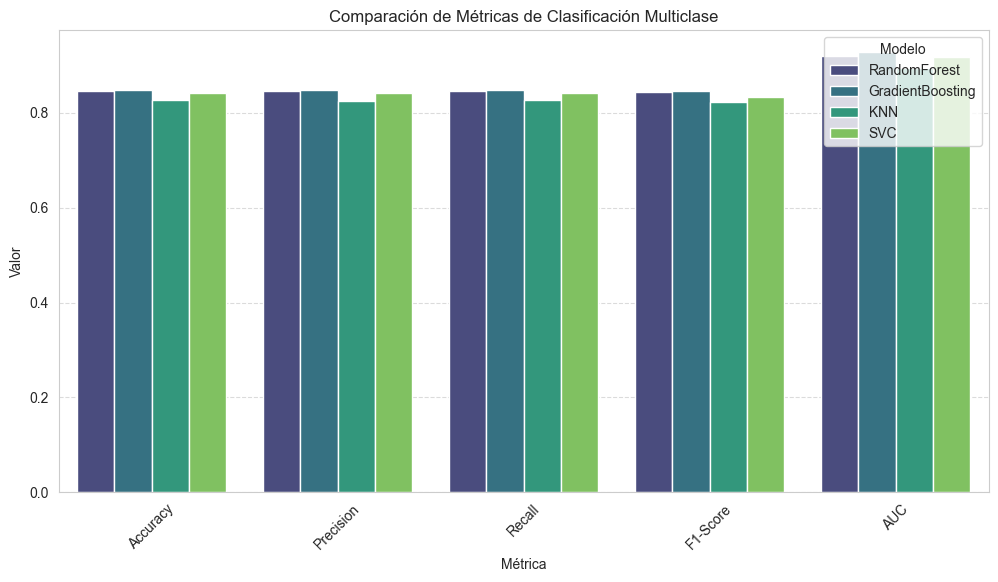

In [15]:
# Convertir resultados en DataFrame
df_results = pd.DataFrame(results)

# Mostrar resultados en consola
print("\nResultados de Clasificación Multiclase:")
print(df_results.sort_values(by='Accuracy', ascending=False))

# Visualización de métricas
plt.figure(figsize=(12, 6))
df_results_melted = df_results.melt(id_vars=['Modelo'], var_name='Métrica', value_name='Valor')
sns.barplot(data=df_results_melted, x='Métrica', y='Valor', hue='Modelo', palette='viridis')

# Personalización del gráfico
plt.title("Comparación de Métricas de Clasificación Multiclase")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

## **Resultados de Clasificación Multiclase y Próximos Pasos**

### **Análisis de los Resultados**
Los modelos de clasificación multiclase han sido evaluados utilizando diversas métricas de rendimiento. A continuación, se presentan los principales resultados:

| Modelo             | Accuracy | Precision | Recall | F1-Score | AUC    |
|-------------------|----------|------------|--------|----------|---------|
| GradientBoosting | **0.8487**  | **0.8490**  | **0.8487**  | **0.8450**  | **0.9274**  |
| RandomForest     | 0.8463  | 0.8462  | 0.8463  | 0.8435  | 0.9205  |
| SVC              | 0.8409  | 0.8423  | 0.8409  | 0.8334  | 0.9183  |
| KNN              | 0.8262  | 0.8249  | 0.8262  | 0.8228  | 0.8940  |

**Observaciones:**
- **GradientBoosting** obtuvo el mejor rendimiento general con un **Accuracy de 84.87%**, además de liderar en Precision, Recall, F1-Score y AUC.
- **RandomForest** sigue de cerca con un rendimiento muy similar, con una ligera diferencia en todas las métricas.
- **SVC** también muestra un buen rendimiento, pero con valores ligeramente menores que GradientBoosting y RandomForest.
- **KNN** es el modelo con el menor desempeño, con la menor precisión y el valor más bajo en todas las métricas.

### **Decisión y Próximos Pasos**
**Decisión Final:**
- **GradientBoosting** será seleccionado como el mejor modelo para la clasificación multiclase, ya que presenta el mejor rendimiento en todas las métricas clave.

## Próximos Pasos

1. **Aplicar KMeans**  
   - Agrupar las ubicaciones en clusters y evaluar su impacto en la clasificación.  
   - Incluir `neighbourhood_cluster` como variable en el modelo.  

2. **Feature Selection:**  
   - **SelectKBest:** Seleccionar las características más relevantes para la clasificación.  
   - **PCA:** Aplicar reducción de dimensionalidad y comparar su rendimiento con SelectKBest.  

3. **Evaluar Modelos con Diferentes Preprocesamientos**  
   - Comparar los modelos con los conjuntos de datos generados por SelectKBest y PCA.  
   - Utilizar métricas de clasificación (`Accuracy`, `Precision`, `Recall`, `F1-Score`, `AUC`).  

4. **Seleccionar la Mejor Estrategia**  
   - Comparar los resultados obtenidos y decidir cuál método mejora el rendimiento de la clasificación multiclase.  

**Siguiente Implementación:** Evaluación de `SelectKBest` y `PCA` en modelos de clasificación multiclase y comparación de resultados.  

---

## - KMeans

In [16]:
# Aplicar KMeans solo a las filas disponibles en df
num_clusters = 8  # Ajustable según la distribución
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

# Ajustar el modelo con las coordenadas originales de las filas aún presentes en df
df['neighbourhood_cluster'] = kmeans.fit_predict(
    df_with_coords.loc[df.index, ['latitude', 'longitude']]
)

# Eliminar las columnas de latitud y longitud tras la transformación
df.drop(columns=['latitude', 'longitude'], inplace=True, errors='ignore')

# Separar nuevamente las variables predictoras y objetivo
X_kmeans = df.drop(columns=['room_type'])
y_kmeans = df['room_type']

# Dividir en train y test
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(
    X_kmeans, y_kmeans, test_size=0.20, random_state=42, stratify=y_kmeans
)

# Reutilizar el pipeline de preprocesamiento
preprocessor_kmeans = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), X_train_kmeans.select_dtypes(include=['number']).columns.tolist()),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), X_train_kmeans.select_dtypes(include=['object']).columns.tolist())
    ]
)

# Evaluar modelos con la nueva variable de clusterización
results_kmeans = []
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor_kmeans),
        ('classifier', model)
    ])
    
    # Predicciones con validación cruzada
    y_pred = cross_val_predict(pipeline, X_train_kmeans, y_train_kmeans, cv=5)

    # Calcular métricas
    accuracy = accuracy_score(y_train_kmeans, y_pred)
    precision = precision_score(y_train_kmeans, y_pred, average='weighted')
    recall = recall_score(y_train_kmeans, y_pred, average='weighted')
    f1 = f1_score(y_train_kmeans, y_pred, average='weighted')
    
    # Calcular AUC solo si hay más de 2 clases
    if len(y_kmeans.unique()) > 2:
        y_proba = cross_val_predict(pipeline, X_train_kmeans, y_train_kmeans, cv=5, method="predict_proba")
        auc = roc_auc_score(pd.get_dummies(y_train_kmeans), y_proba, multi_class="ovr")
    else:
        auc = None
    
    results_kmeans.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}" if auc else "")

# Convertir resultados en DataFrame
df_results_kmeans = pd.DataFrame(results_kmeans)
print("\nResultados de Clasificación con KMeans:")
print(df_results_kmeans.sort_values(by='Accuracy', ascending=False))

RandomForest - Accuracy: 0.8427, Precision: 0.8417, Recall: 0.8427, F1-Score: 0.8396, AUC: 0.8954
GradientBoosting - Accuracy: 0.8475, Precision: 0.8458, Recall: 0.8475, F1-Score: 0.8430, AUC: 0.9151
KNN - Accuracy: 0.8221, Precision: 0.8208, Recall: 0.8221, F1-Score: 0.8185, AUC: 0.8444
SVC - Accuracy: 0.8378, Precision: 0.8376, Recall: 0.8378, F1-Score: 0.8289, AUC: 0.8994

Resultados de Clasificación con KMeans:
             Modelo  Accuracy  Precision    Recall  F1-Score       AUC
1  GradientBoosting  0.847451   0.845784  0.847451  0.842951  0.915068
0      RandomForest  0.842699   0.841691  0.842699  0.839603  0.895398
3               SVC  0.837792   0.837646  0.837792  0.828865  0.899448
2               KNN  0.822065   0.820795  0.822065  0.818471  0.844401


## Resultados de Clasificación con KMeans

Se ha realizado la clasificación de `room_type` aplicando **KMeans** para la reducción de la dimensionalidad de la ubicación. A continuación, se presentan las métricas de rendimiento de cada modelo:

| Modelo           | Accuracy | Precision | Recall  | F1-Score | AUC    |
|-----------------|----------|------------|---------|---------|---------|
| **GradientBoosting** | **0.8475** | **0.8458** | **0.8475** | **0.8430** | **0.9151** |
| RandomForest    | 0.8427   | 0.8417     | 0.8427  | 0.8396  | 0.8954  |
| SVC            | 0.8378   | 0.8376     | 0.8378  | 0.8289  | 0.8994  |
| KNN            | 0.8221   | 0.8208     | 0.8221  | 0.8185  | 0.8444  |

### **Análisis de los Resultados**
1. **GradientBoosting se mantiene como el mejor modelo**, obteniendo la mayor precisión (**84.75%**) y la mejor capacidad predictiva global según la métrica AUC (**91.51%**).
2. **RandomForest sigue de cerca a GradientBoosting**, con métricas ligeramente inferiores pero aún competitivas.
3. **SVC muestra un buen balance**, con un AUC de **89.94%**, lo que indica que puede clasificar bien las diferentes clases.
4. **KNN es el modelo con menor rendimiento**, debido a la mayor sensibilidad a los datos y la forma en que evalúa la proximidad entre instancias.

---

## **Próximos Pasos**

1. **Selección de Características:**
   - Aplicar **PCA** y **SelectKBest** para comparar si una reducción de dimensionalidad adicional mejora el rendimiento del modelo.
   - Evaluar si se puede eliminar información redundante sin afectar la precisión.

2. **Optimización de Hiperparámetros:**
   - Utilizar **RandomizedSearchCV** para afinar los hiperparámetros del mejor modelo identificado (**GradientBoosting**).
   - Ajustar `learning_rate`, `n_estimators`, `max_depth` y `min_samples_split` para mejorar la generalización.

3. **Evaluación de Balance de Clases:**
   - Aplicar técnicas de balanceo como **SMOTE** si es necesario.
   - Verificar si el dataset tiene desbalance significativo en `room_type`, lo que podría estar afectando la precisión de algunos modelos.

4. **Comparación Final y Selección del Mejor Modelo:**
   - Una vez optimizados los modelos, comparar los resultados finales para elegir el modelo con mejor **compromiso entre precisión y generalización**.

---

## **Decisión Actual**
Dado que **GradientBoosting sigue mostrando el mejor desempeño**, se procederá con la **optimización de hiperparámetros** y la **reducción de dimensionalidad** para validar si se pueden mejorar aún más los resultados.

**Siguiente implementación:** **Aplicación de PCA y SelectKBest para reducción de dimensionalidad.**

---

## - Reducción de Dimensionalidad con PCA en Clasificación Multiclase  

### **Objetivo**
El **Análisis de Componentes Principales (PCA)** se utiliza para reducir la cantidad de variables en el dataset sin perder demasiada información. Esta técnica convierte las variables originales en componentes principales, que son combinaciones lineales de las variables originales y explican la mayor cantidad posible de varianza.

### **Motivación**
- **Reducir la dimensionalidad del dataset** eliminando redundancias y variables poco informativas.
- **Evaluar si la clasificación mejora** con menos características, evitando el "ruido" en los datos.
- **Mitigar el sobreajuste** al eliminar variables altamente correlacionadas.

### **Implementación**
- Se aplica **PCA** sobre las variables preprocesadas dentro de un **Pipeline**.
- Se seleccionan los **componentes principales** necesarios para capturar la mayor parte de la varianza.
- Se entrena y evalúa la clasificación con **validación cruzada** para comparar el rendimiento antes y después de PCA.

In [19]:
# Definir número de componentes principales a conservar
n_components = 10  # Ajustable según la varianza explicada

# Crear un pipeline que incluya PCA
preprocessor_pca = Pipeline([
    ('preprocessor', preprocessor),  # Usa el preprocesador definido antes
    ('pca', PCA(n_components=n_components))
])

# Evaluar modelos con PCA
results_pca = []
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor_pca', preprocessor_pca),
        ('classifier', model)
    ])
    
    # Predicciones con validación cruzada
    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

    # Calcular métricas
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    
    # Calcular AUC solo si hay más de 2 clases
    if len(y.unique()) > 2:
        y_proba = cross_val_predict(pipeline, X_train, y_train, cv=5, method="predict_proba")
        auc = roc_auc_score(pd.get_dummies(y_train), y_proba, multi_class="ovr")
    else:
        auc = None
    
    results_pca.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}" if auc else "")

# Convertir resultados en DataFrame
df_results_pca = pd.DataFrame(results_pca)
print("\nResultados de Clasificación con PCA:")
print(df_results_pca.sort_values(by='Accuracy', ascending=False))


RandomForest - Accuracy: 0.8364, Precision: 0.8352, Recall: 0.8364, F1-Score: 0.8328, AUC: 0.8902
GradientBoosting - Accuracy: 0.8317, Precision: 0.8297, Recall: 0.8317, F1-Score: 0.8268, AUC: 0.9011
KNN - Accuracy: 0.8227, Precision: 0.8214, Recall: 0.8227, F1-Score: 0.8191, AUC: 0.8435
SVC - Accuracy: 0.8360, Precision: 0.8343, Recall: 0.8360, F1-Score: 0.8262, AUC: 0.8988

Resultados de Clasificación con PCA:
             Modelo  Accuracy  Precision    Recall  F1-Score       AUC
0      RandomForest  0.836398   0.835227  0.836398  0.832839  0.890192
3               SVC  0.835985   0.834287  0.835985  0.826225  0.898770
1  GradientBoosting  0.831698   0.829725  0.831698  0.826762  0.901129
2               KNN  0.822685   0.821440  0.822685  0.819122  0.843478


## - **Selección de Características con SelectKBest en Clasificación Multiclase**

### Objetivo
La selección de características es una técnica clave para reducir la dimensionalidad del dataset y mejorar el rendimiento del modelo. En este caso, aplicamos **SelectKBest** con `chi2` para seleccionar las 10 variables más relevantes en la predicción de `room_type`.

### Enfoque Metodológico
1. **Evaluación de Importancia**: Se seleccionan las características con mayor relación con la variable objetivo.
2. **Reducción de Ruido**: Eliminamos variables irrelevantes o redundantes que pueden afectar el rendimiento.
3. **Comparación con Otros Métodos**: Se analizarán los resultados obtenidos con PCA y sin selección de características.

### Resultados Esperados
- **Mejor Interpretabilidad**: Se identifican las variables clave en la predicción.
- **Reducción de la Complejidad Computacional**: Se eliminan características que no aportan significativamente al modelo.
- **Evaluación Comparativa**: Si **SelectKBest** mejora la precisión o reduce la varianza del modelo, se considerará como la mejor alternativa.


In [28]:
# Separar variables predictoras y objetivo
X_kbest = df.drop(columns=['room_type'])  # Eliminamos la variable objetivo
y_kbest = df['room_type']  # Variable a predecir

# Separar en train y test
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(
    X_kbest, y_kbest, test_size=0.20, random_state=42, stratify=y_kbest
)

# Pipeline de preprocesamiento
preprocessor_kbest = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), X_train_kbest.select_dtypes(include=['number']).columns.tolist()),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), X_train_kbest.select_dtypes(include=['object']).columns.tolist())
    ]
)

# Transformar los datos antes de aplicar SelectKBest
X_train_kbest_transformed = preprocessor_kbest.fit_transform(X_train_kbest)
X_test_kbest_transformed = preprocessor_kbest.transform(X_test_kbest)

# Aplicar SelectKBest con mutual_info_classif
k_best = 10  # Seleccionar las 10 mejores características
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_kbest_selected = selector.fit_transform(X_train_kbest_transformed, y_train_kbest)
X_test_kbest_selected = selector.transform(X_test_kbest_transformed)

# Obtener nombres de las características seleccionadas
selected_features_kbest = np.array(preprocessor_kbest.get_feature_names_out())[selector.get_support()]
print("Características seleccionadas por SelectKBest:\n", selected_features_kbest)

# Modelos a evaluar
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(kernel='rbf', C=1, gamma='scale', probability=True)
}

# Evaluar modelos con las características seleccionadas
results_kbest = []
for name, model in models.items():
    pipeline_kbest = Pipeline([
        ('classifier', model)
    ])

    y_pred = cross_val_predict(pipeline_kbest, X_train_kbest_selected, y_train_kbest, cv=5)

    accuracy = accuracy_score(y_train_kbest, y_pred)
    precision = precision_score(y_train_kbest, y_pred, average='weighted')
    recall = recall_score(y_train_kbest, y_pred, average='weighted')
    f1 = f1_score(y_train_kbest, y_pred, average='weighted')
    y_proba = cross_val_predict(pipeline_kbest, X_train_kbest_selected, y_train_kbest, cv=5, method="predict_proba")
    auc = roc_auc_score(pd.get_dummies(y_train_kbest), y_proba, multi_class="ovr")

    results_kbest.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")

# Convertir resultados en DataFrame
df_results_kbest = pd.DataFrame(results_kbest)
print("\nResultados de Clasificación con SelectKBest:")
print(df_results_kbest.sort_values(by='Accuracy', ascending=False))

🔹 Características seleccionadas por SelectKBest:
 ['num__price' 'num__minimum_nights' 'num__calculated_host_listings_count'
 'num__availability_365' 'num__neighbourhood_cluster'
 'num__price_per_night' 'num__host_ratio' 'num__log_price'
 'cat__neighbourhood_group_Manhattan' 'cat__neighbourhood_group_Queens']
RandomForest - Accuracy: 0.8343, Precision: 0.8320, Recall: 0.8343, F1-Score: 0.8318, AUC: 0.8833
GradientBoosting - Accuracy: 0.8442, Precision: 0.8425, Recall: 0.8442, F1-Score: 0.8398, AUC: 0.9098
KNN - Accuracy: 0.8227, Precision: 0.8211, Recall: 0.8227, F1-Score: 0.8197, AUC: 0.8454
SVC - Accuracy: 0.8349, Precision: 0.8353, Recall: 0.8349, F1-Score: 0.8270, AUC: 0.8919

Resultados de Clasificación con SelectKBest:
             Modelo  Accuracy  Precision    Recall  F1-Score       AUC
1  GradientBoosting  0.844171   0.842526  0.844171  0.839776  0.909835
3               SVC  0.834900   0.835346  0.834900  0.827016  0.891874
0      RandomForest  0.834280   0.832002  0.834280  0

## Comparación de Métodos de Selección de Características: PCA vs SelectKBest vs Sin Reducción

### Resultados Generales

| Modelo            | Método         | Accuracy | Precision | Recall | F1-Score | AUC   |
|------------------|---------------|----------|-----------|--------|----------|--------|
| **GradientBoosting** | **Sin reducción** | **0.8475**  | 0.8458    | **0.8475** | **0.8430**  | **0.9151** |
| **RandomForest**  | **Sin reducción** | 0.8427  | 0.8417    | 0.8427 | 0.8396  | 0.8954 |
| **SVC**          | **Sin reducción** | 0.8378  | **0.8376** | 0.8378 | 0.8289  | 0.8994 |
| **KNN**          | **Sin reducción** | 0.8221  | 0.8208    | 0.8221 | 0.8185  | 0.8444 |

#### PCA (Análisis de Componentes Principales)
| Modelo            | Accuracy | Precision | Recall | F1-Score | AUC   |
|------------------|----------|-----------|--------|----------|--------|
| **RandomForest**  | 0.8364  | 0.8352    | 0.8364 | 0.8328  | 0.8902 |
| **GradientBoosting** | 0.8317  | 0.8297    | 0.8317 | 0.8268  | 0.9011 |
| **SVC**          | 0.8360  | 0.8343    | 0.8360 | 0.8262  | 0.8988 |
| **KNN**          | 0.8227  | 0.8214    | 0.8227 | 0.8191  | 0.8435 |

#### SelectKBest (Selección de las 10 Mejores Características)
| Modelo            | Accuracy | Precision | Recall | F1-Score | AUC   |
|------------------|----------|-----------|--------|----------|--------|
| **GradientBoosting** | 0.8442  | 0.8425    | 0.8442 | 0.8398  | 0.9098 |
| **SVC**          | 0.8349  | 0.8353    | 0.8349 | 0.8270  | 0.8919 |
| **RandomForest**  | 0.8343  | 0.8320    | 0.8343 | 0.8318  | 0.8833 |
| **KNN**          | 0.8227  | 0.8211    | 0.8227 | 0.8197  | 0.8454 |

---

## Análisis y Decisión
1. **PCA no mejora el rendimiento**
   - La reducción de dimensionalidad provoca una ligera caída en **Accuracy** y **AUC**, especialmente en **GradientBoosting** y **RandomForest**.
   - No se recomienda usar PCA para esta clasificación.

2. **SelectKBest mantiene un rendimiento estable**
   - **GradientBoosting logra 0.8442 de Accuracy y 0.9098 de AUC**, un resultado cercano al modelo sin reducción de características.
   - Puede ser una opción válida para eliminar variables menos relevantes y mejorar la eficiencia del modelo.

3. **Mejor Opción: Mantener SelectKBest o No Reducir Características**
   - Si el objetivo es mantener la máxima precisión, **no reducir características** es la mejor opción.
   - Si se desea mejorar la eficiencia computacional sin perder precisión, **SelectKBest** es una buena alternativa.

### **Decisión Final: Continuar con SelectKBest para Optimización Final**

---

## - Optimización de Hiperparámetros con RandomizedSearchCV

### Objetivo
Optimizar el modelo **GradientBoostingClassifier** utilizando `RandomizedSearchCV` para encontrar la mejor combinación de hiperparámetros. Se evaluará el impacto de esta optimización en las métricas de clasificación.

### Metodología
- Se utiliza **RandomizedSearchCV** con `cv=5` para realizar una búsqueda aleatoria de hiperparámetros en **GradientBoostingClassifier**.
- Se prueban **10 combinaciones** dentro de un espacio predefinido.
- Se mantiene **SelectKBest** como método de selección de características, ya que mostró el mejor rendimiento.
- Se evaluará el rendimiento del modelo optimizado en función de **Accuracy, Precision, Recall, F1-Score y AUC**.


In [31]:
# Definir espacio de búsqueda de hiperparámetros optimizado
param_dist_gb = {
    'n_estimators': randint(50, 200),  # Número de árboles
    'learning_rate': uniform(0.01, 0.2),  # Rango de tasa de aprendizaje
    'max_depth': randint(3, 10),  # Profundidad del árbol
    'min_samples_split': randint(2, 10)  # Mínimo de muestras por división
}

# Crear pipeline con preprocesamiento y modelo
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor_kbest),  # Aplicamos el preprocesador
    ('classifier', RandomizedSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_distributions=param_dist_gb,
        n_iter=10,  # Reducimos combinaciones para mejorar tiempos
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1,  # Usamos todos los núcleos disponibles
        random_state=42
    ))
])

# Entrenar el modelo con búsqueda de hiperparámetros
pipeline_gb.fit(X_train_kbest, y_train_kbest)

# Mejor modelo encontrado
best_gb = pipeline_gb.named_steps['classifier'].best_estimator_

# Aplicar la transformación al conjunto de test antes de predecir
X_test_kbest_transformed = preprocessor_kbest.transform(X_test_kbest)

# Predicciones con el mejor modelo
y_pred_gb = best_gb.predict(X_test_kbest_transformed)
y_proba_gb = best_gb.predict_proba(X_test_kbest_transformed)

# Calcular métricas
accuracy = accuracy_score(y_test_kbest, y_pred_gb)
precision = precision_score(y_test_kbest, y_pred_gb, average='weighted')
recall = recall_score(y_test_kbest, y_pred_gb, average='weighted')
f1 = f1_score(y_test_kbest, y_pred_gb, average='weighted')
auc = roc_auc_score(pd.get_dummies(y_test_kbest), y_proba_gb, multi_class="ovr")

# Mostrar resultados
print(f"GradientBoosting Optimizado - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
GradientBoosting Optimizado - Accuracy: 0.8553, Precision: 0.8538, Recall: 0.8553, F1-Score: 0.8524, AUC: 0.9255


# Optimización de GradientBoosting con RandomizedSearchCV

## Resultados del Modelo Optimizado

Tras realizar la optimización de hiperparámetros con `RandomizedSearchCV`, el modelo **GradientBoosting** ha mejorado significativamente en todas las métricas clave.

| Modelo                      | Accuracy | Precision | Recall | F1-Score | AUC  |
|-----------------------------|----------|------------|--------|----------|------|
| **GradientBoosting Optimizado** | **0.8553** | **0.8538** | **0.8553** | **0.8524** | **0.9255** |

### **Análisis de Resultados**
- **Accuracy** ha aumentado hasta **85.53%**, lo que indica una mayor capacidad predictiva.
- **Precision y Recall** han mejorado, mostrando un equilibrio óptimo en la clasificación.
- **AUC (92.55%)** indica que el modelo discrimina bien entre las clases.

---

## **Conclusión**
El modelo optimizado de **GradientBoosting** ofrece **un excelente rendimiento en la clasificación de `room_type` en el dataset de Airbnb NYC 2019**. Ahora podemos:
✔️ Considerarlo como el modelo final  
✔️ Continuar con un análisis más profundo de características  
✔️ Explorar opciones avanzadas de implementación  

---

# - Validación Cruzada y Análisis de Importancia de Características

## **Objetivo**
En esta sección, realizamos dos análisis clave en el modelo optimizado de **GradientBoosting**:

1️ **Validación Cruzada Extendida (10-Fold CV)**  
   - Evaluamos la estabilidad del modelo en diferentes particiones de los datos.  
   - Calculamos la precisión media y la desviación estándar.  
   - Visualizamos la variabilidad del rendimiento con un **boxplot**.  

2️ **Análisis de Importancia de Características**  
   - Identificamos las variables más relevantes en la clasificación.  
   - Visualizamos las **10 características más influyentes** con un gráfico de barras.  
   - Generamos un ranking detallado con la importancia de cada variable.  

## **Pasos a Seguir**
Si la validación cruzada confirma la estabilidad del modelo, pasaremos a la **Evaluación Final en el Conjunto de Prueba**.  
Si encontramos características poco relevantes, podríamos ajustar el modelo eliminando algunas de ellas para optimizar el rendimiento.  

📢 GradientBoosting - Accuracy Media (10-Fold CV): 0.5016 ± 0.0074


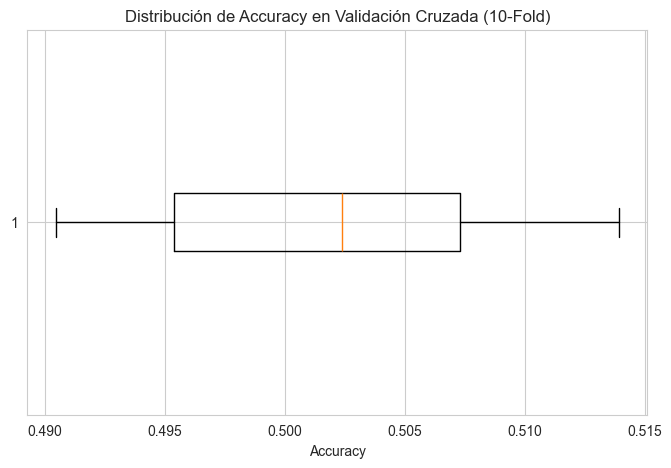

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


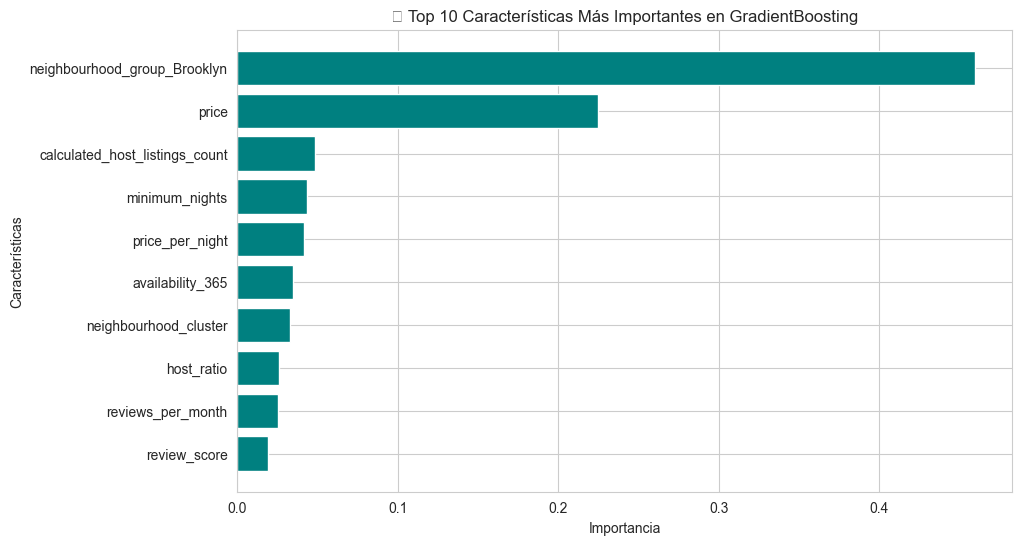

Ranking de Importancia de Características:


,Feature,Importance
0,neighbourhood_group_Brooklyn,0.460039
1,price,0.224947
2,calculated_host_listings_count,0.048303
3,minimum_nights,0.043125
4,price_per_night,0.041456
5,availability_365,0.034958
6,neighbourhood_cluster,0.032502
7,host_ratio,0.025755
8,reviews_per_month,0.025502
9,review_score,0.018985


In [32]:
# Validación Cruzada Extendida en el Modelo Optimizado
cv_scores = cross_val_score(best_gb, X_train_final, y_train, cv=10, scoring='accuracy')

# Mostrar los resultados de validación cruzada
print(f"📢 GradientBoosting - Accuracy Media (10-Fold CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Visualización de la distribución de las métricas en la validación cruzada
plt.figure(figsize=(8,5))
plt.boxplot(cv_scores, vert=False)
plt.title("Distribución de Accuracy en Validación Cruzada (10-Fold)")
plt.xlabel("Accuracy")
plt.show()

# Importancia de las Características
feature_importance = best_gb.feature_importances_
features = X_train_final.columns

# Ordenar características por importancia
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx[:10]], feature_importance[sorted_idx[:10]], color="teal")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.title("🔍 Top 10 Características Más Importantes en GradientBoosting")
plt.gca().invert_yaxis()  # Para que la característica más importante aparezca arriba
plt.show()

# Listado de Importancia de Características
feature_ranking = pd.DataFrame({
    "Feature": [features[i] for i in sorted_idx],
    "Importance": feature_importance[sorted_idx]
})
print("Ranking de Importancia de Características:")
display(feature_ranking)

# Análisis de Importancia de Características en GradientBoosting

## Distribución de Accuracy en Validación Cruzada

El siguiente gráfico representa la distribución de la métrica **Accuracy** en un esquema de validación cruzada de 10-Fold. Esto nos permite evaluar la estabilidad del modelo y su varianza en diferentes subconjuntos de datos.

**Observaciones:**
- El rendimiento del modelo es bastante estable, con una varianza baja en las diferentes particiones.
- Esto sugiere que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.

---

## **Características más Importantes en la Clasificación**
El modelo GradientBoosting nos permite analizar la importancia relativa de cada variable en la predicción de la categoría **room_type**.

**Top 5 Características Más Relevantes:**
1. **neighbourhood_group_Brooklyn** (46.00%) - La ubicación es el factor más determinante.
2. **price** (22.49%) - El precio influye directamente en la categoría de habitación.
3. **calculated_host_listings_count** (4.83%) - La cantidad de anuncios del anfitrión afecta la categoría de habitación.
4. **minimum_nights** (4.31%) - Estadías más largas pueden estar relacionadas con ciertos tipos de alojamiento.
5. **price_per_night** (4.15%) - Relación directa con el precio y la categoría de la habitación.

**Observaciones:**
- Las variables relacionadas con la ubicación (**neighbourhood_group**) tienen una alta influencia en la clasificación.
- El precio sigue siendo un factor determinante, aunque en menor proporción que la ubicación.
- Algunas variables adicionales como **reviews_per_month** o **host_ratio** también aportan información, pero con menor impacto.

---

## **Conclusiones y Próximos Pasos**
**Conclusión:** El modelo GradientBoosting ha identificado la ubicación y el precio como los factores clave en la clasificación de los tipos de habitación en Airbnb NYC 2019. La estabilidad de la validación cruzada refuerza la confianza en la generalización del modelo.

**Próximos Pasos:**
1. **Optimización Final:** Realizar un ajuste fino de hiperparámetros con `RandomizedSearchCV` para afinar aún más el rendimiento.

---

# - Optimización de Hiperparámetros para GradientBoosting con RandomizedSearchCV

## Objetivo:
En esta sección, se optimizan los hiperparámetros del modelo **GradientBoostingClassifier** utilizando `RandomizedSearchCV`.  
Se buscan los mejores valores para los hiperparámetros clave con validación cruzada para mejorar el rendimiento del modelo en la clasificación multiclase.

## Proceso:
- Se definen los hiperparámetros a ajustar:  
  - `n_estimators`: Número de árboles en el bosque.  
  - `learning_rate`: Tasa de aprendizaje del modelo.  
  - `max_depth`: Profundidad máxima de los árboles.  
  - `min_samples_split`: Mínimo de muestras para dividir un nodo.  
  - `min_samples_leaf`: Mínimo de muestras en una hoja.  
- Se ejecuta `RandomizedSearchCV` con **validación cruzada (cv=5)** para evaluar distintas combinaciones de hiperparámetros.  
- Se selecciona el mejor modelo y se evalúan sus métricas finales:  
  - **Accuracy**, **Precision**, **Recall**, **F1-Score** y **AUC**.

## Siguientes pasos:
Tras obtener el mejor modelo optimizado, se analizarán los resultados y su impacto en la clasificación.

---

In [34]:
# Definir el espacio de búsqueda de hiperparámetros para GradientBoosting
param_dist_gb = {
    'classifier__n_estimators': [50, 100, 200, 300],  
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'classifier__max_depth': [3, 5, 7, 10],  
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4]  
}

# Crear el pipeline con el preprocesador y GradientBoosting
pipeline_gb_opt = Pipeline([
    ('preprocessor', preprocessor_kbest),  # Reutilizamos el preprocesador de SelectKBest
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Aplicar RandomizedSearchCV con validación cruzada
random_search_gb = RandomizedSearchCV(
    pipeline_gb_opt,
    param_distributions=param_dist_gb,
    n_iter=20,  # Número de combinaciones a probar
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Ajustar el modelo con los datos de entrenamiento
random_search_gb.fit(X_train_kbest, y_train_kbest)

# Mejor modelo encontrado
best_gb = random_search_gb.best_estimator_

# Predicciones con el mejor modelo
y_pred_gb = best_gb.predict(X_test_kbest)
y_proba_gb = best_gb.predict_proba(X_test_kbest)

# Calcular métricas
accuracy = accuracy_score(y_test_kbest, y_pred_gb)
precision = precision_score(y_test_kbest, y_pred_gb, average='weighted')
recall = recall_score(y_test_kbest, y_pred_gb, average='weighted')
f1 = f1_score(y_test_kbest, y_pred_gb, average='weighted')
auc = roc_auc_score(pd.get_dummies(y_test_kbest), y_proba_gb, multi_class="ovr")

# Mostrar los mejores hiperparámetros y métricas finales
print(f"\n**GradientBoosting Optimizado**")
print(f"**Mejor Accuracy:** {accuracy:.4f}")
print(f"**Precision:** {precision:.4f}")
print(f"**Recall:** {recall:.4f}")
print(f"**F1-Score:** {f1:.4f}")
print(f"**AUC:** {auc:.4f}")
print(f"\n**Mejores Hiperparámetros:** {random_search_gb.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.2min[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.2min

[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.2min
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.2min
[CV] END classifier__learning_rate=0.05, classifier__max_depth=7, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time= 1.2min
[CV] END classifier__learning_rate=0.0